In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from smol.plotting import  register_seaborn_palettes
import torch
import pandas as pd

sns.set_style("white")
register_seaborn_palettes()

In [3]:
a = torch.arange(-10, 10, step=0.05)  # N,
sigma_a = torch.sigmoid(a)  # N,

log_k = torch.tensor([-1, -0.5, 0, 0.5, 1])

k = torch.exp(log_k)  # M,

In [13]:
_datas = []
for x, _a in zip(sigma_a, a):
    _datas.append({
        "k": f"no_update",
        "a": _a.item(),
        "x": x.item(),
        "y0": x.item(),
        "y1": x.item(),
    })

for _k in k:
    sigma_a_k = torch.sigmoid(a - _k * sigma_a)
    sigma_a_k_plus = torch.sigmoid(a - _k * sigma_a + _k)
    for (x, _a, y0, y1) in zip(sigma_a, a, sigma_a_k, sigma_a_k_plus):
        _datas.append({
            "k": f"{_k.item():.2f}",
            "a": _a.item(),
            "x": x.item(),
            "y0": y0.item(),
            "y1": y1.item(),
        })
df = pd.DataFrame.from_records(_datas)

/tmp/ipykernel_2416506/191431294.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=df, x="x", y="y0", hue="k", style="k", palette=cmap, ax=axes[0])
/tmp/ipykernel_2416506/191431294.py:8: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=df, x="x", y="y1", hue="k", style="k", palette=cmap, ax=axes[1])


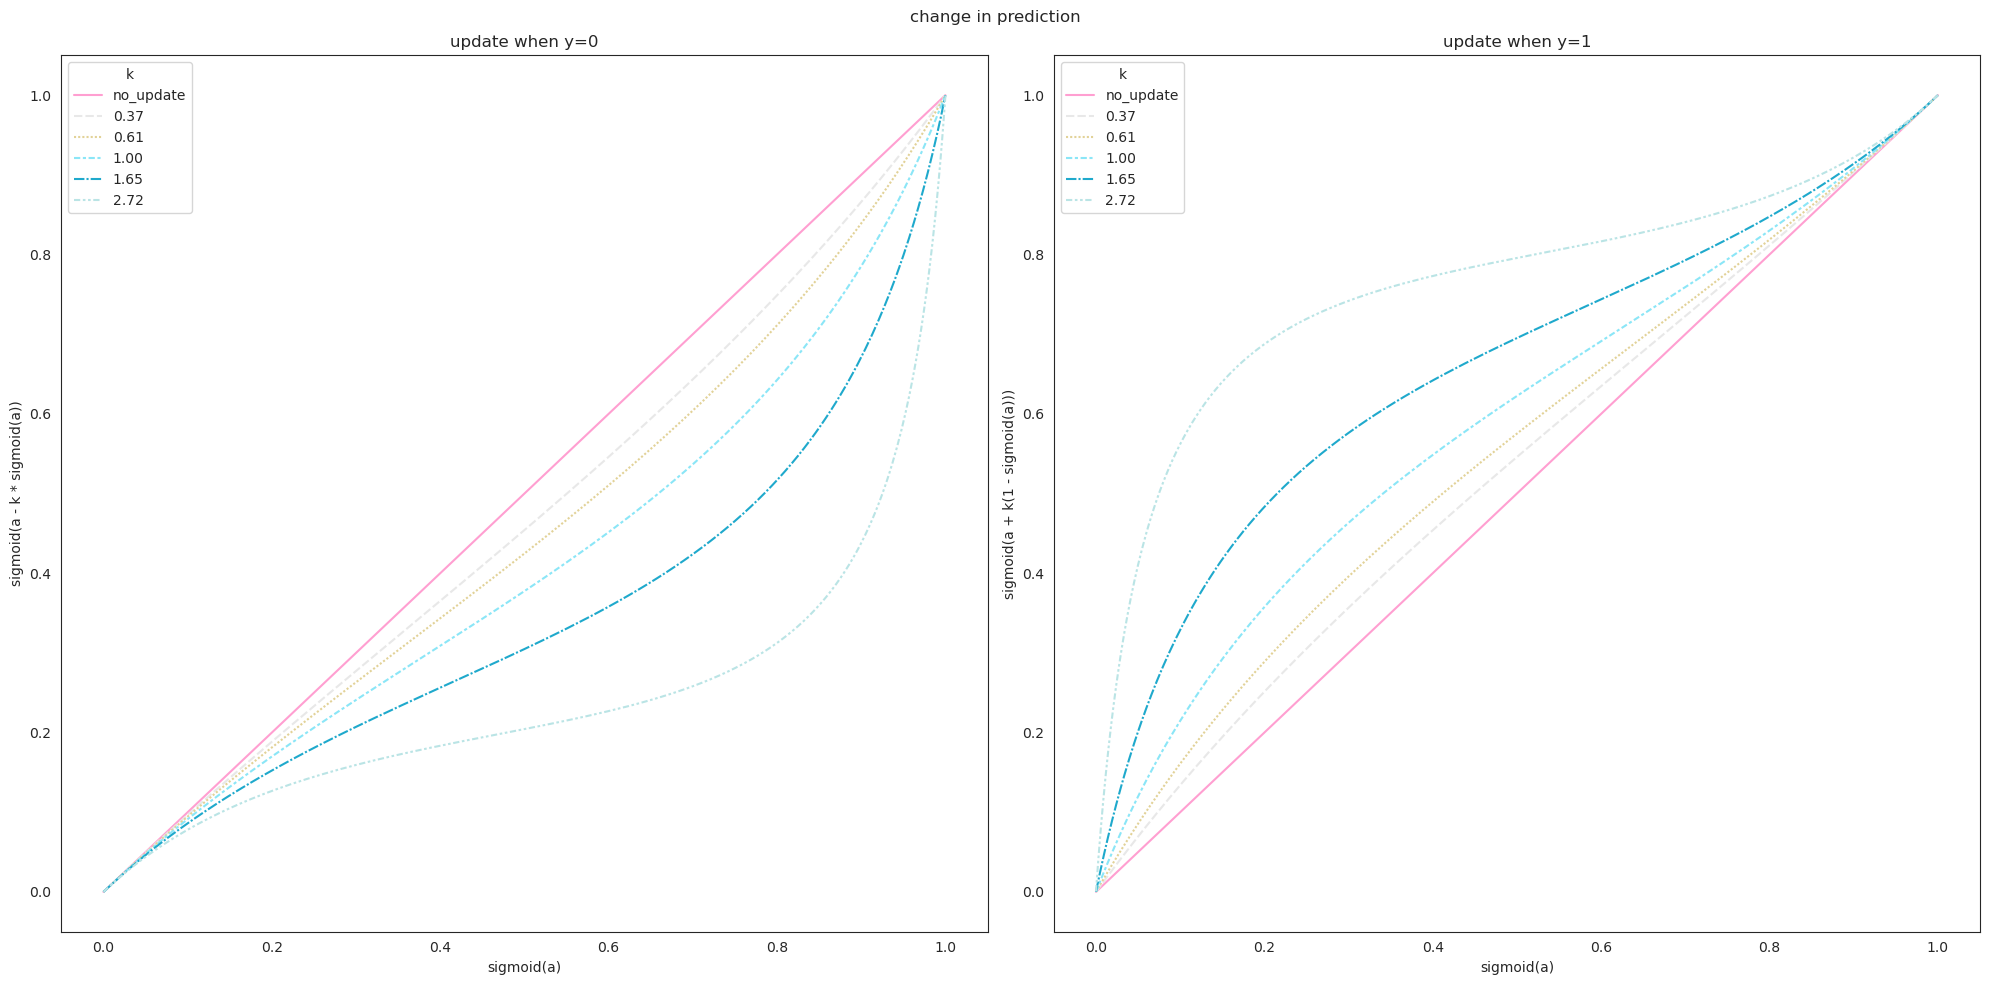

In [26]:

fig, axes = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)
cmap = sns.color_palette("cherry_blossoms", n_colors=df.k.nunique(), as_cmap=True)
sns.lineplot(data=df, x="x", y="y0", hue="k", style="k", palette=cmap, ax=axes[0])
axes[0].set_xlabel("sigmoid(a)")
axes[0].set_ylabel("sigmoid(a - k * sigmoid(a))")
axes[0].set_title("update when y=0")

sns.lineplot(data=df, x="x", y="y1", hue="k", style="k", palette=cmap, ax=axes[1])
axes[1].set_xlabel("sigmoid(a)")
axes[1].set_ylabel("sigmoid(a + k(1 - sigmoid(a)))")
axes[1].set_title("update when y=1")

fig.suptitle("change in prediction")
fig.tight_layout()
plt.savefig("outputs/one_perceptron_pt2/sigma_vs_sigma.png", bbox_inches="tight")

In [33]:
sns.color_palette("cherry_blossoms", n_colors=df.k.nunique(), as_cmap=False)

[(1.0, 0.6235294117647059, 0.8196078431372549),
 (0.9098039215686274, 0.9098039215686274, 0.9098039215686274),
 (0.8862745098039215, 0.8235294117647058, 0.596078431372549),
 (0.5450980392156862, 0.9019607843137255, 0.9686274509803922),
 (0.12156862745098039, 0.6627450980392157, 0.8),
 (0.7294117647058823, 0.8941176470588236, 0.8980392156862745)]

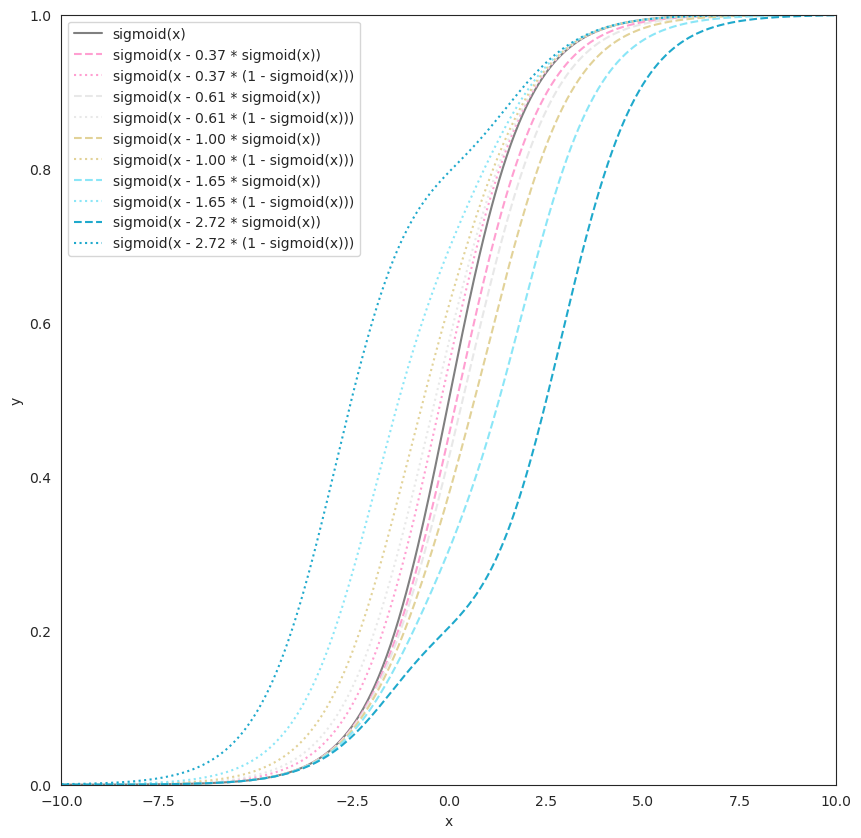

In [38]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)

ax.plot(a, sigma_a, label="sigmoid(x)", linestyle="solid", color="gray")

for i, _k in enumerate(k):
    color = cmap[i]
    sigma_a_k = torch.sigmoid(a - _k * sigma_a)
    ax.plot(a, sigma_a_k, linestyle="--", label=f"sigmoid(x - {_k:.2f} * sigmoid(x))", color=color)
    sigma_a_k_plus = torch.sigmoid(a - _k * sigma_a + _k)
    ax.plot(a, sigma_a_k_plus, linestyle=":", label=f"sigmoid(x - {_k:.2f} * (1 - sigmoid(x)))", color=color)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim((-10, 10))
ax.set_ylim((0, 1))

plt.legend(loc="best")
plt.savefig("outputs/one_perceptron_pt2/sigmas.png", bbox_inches="tight")